**FLASK THAT WORKS -- PLEASE DONT TOUCH IT**

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Jan/2023 10:15:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Jan/2023 10:15:19] "GET /static/bootstrap.min.css HTTP/1.1" 304 -
127.0.0.1 - - [29/Jan/2023 10:15:19] "GET /static/fontawesome-all.min.css HTTP/1.1" 304 -
127.0.0.1 - - [29/Jan/2023 10:15:19] "GET /static/swiper.css HTTP/1.1" 304 -
127.0.0.1 - - [29/Jan/2023 10:15:19] "GET /static/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [29/Jan/2023 10:15:19] "GET /static/bootstrap.min.js HTTP/1.1" 304 -
127.0.0.1 - - [29/Jan/2023 10:15:19] "GET /static/owlmaximusicon.png HTTP/1.1" 304 -
127.0.0.1 - - [29/Jan/2023 10:15:19] "GET /static/purecounter.min.js HTTP/1.1" 304 -
127.0.0.1 - - [29/Jan/2023 10:15:19] "GET /static/swiper.min.js HTTP/1.1" 304 -
127.0.0.1 - - [29/Jan/2023 10:15:19] "GET /static/scripts.js HTTP/1.1" 304 -
127.0.0.1 - - [29/Jan/2023 10:15:19] "GET /static/up-arrow.png HTTP/1.1" 304 -
127.0.0.1 - - [29/Jan/2023 10:15:19] "GET /webfonts/fa-brands-4

127.0.0.1 - - [29/Jan/2023 10:17:31] "GET /webfonts/fa-brands-400.ttf HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:17:33] "GET /myBookshelf HTTP/1.1" 200 -
127.0.0.1 - - [29/Jan/2023 10:17:33] "GET /webfonts/fa-solid-900.woff2 HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:17:33] "GET /webfonts/fa-brands-400.woff2 HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:17:33] "GET /webfonts/fa-solid-900.woff HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:17:33] "GET /webfonts/fa-brands-400.woff HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:17:34] "GET /webfonts/fa-solid-900.ttf HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:17:34] "GET /webfonts/fa-brands-400.ttf HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:17:49] "GET /myProfile/PEA071194 HTTP/1.1" 200 -
127.0.0.1 - - [29/Jan/2023 10:17:49] "GET /webfonts/fa-solid-900.woff2 HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:17:49] "GET /webfonts/fa-brands-400.woff2 HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:17:49] "GET /webfonts/fa-solid-900.woff 

127.0.0.1 - - [29/Jan/2023 10:19:41] "GET /webfonts/fa-solid-900.woff HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:19:41] "GET /webfonts/fa-brands-400.woff HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:19:41] "GET /webfonts/fa-solid-900.ttf HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:19:41] "GET /webfonts/fa-brands-400.ttf HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:19:52] "GET /myProfile/ANT210599 HTTP/1.1" 200 -
127.0.0.1 - - [29/Jan/2023 10:19:52] "GET /webfonts/fa-solid-900.woff2 HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:19:52] "GET /webfonts/fa-brands-400.woff2 HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:19:52] "GET /webfonts/fa-solid-900.woff HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:19:52] "GET /webfonts/fa-brands-400.woff HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:19:52] "GET /webfonts/fa-solid-900.ttf HTTP/1.1" 404 -
127.0.0.1 - - [29/Jan/2023 10:19:52] "GET /webfonts/fa-brands-400.ttf HTTP/1.1" 404 -


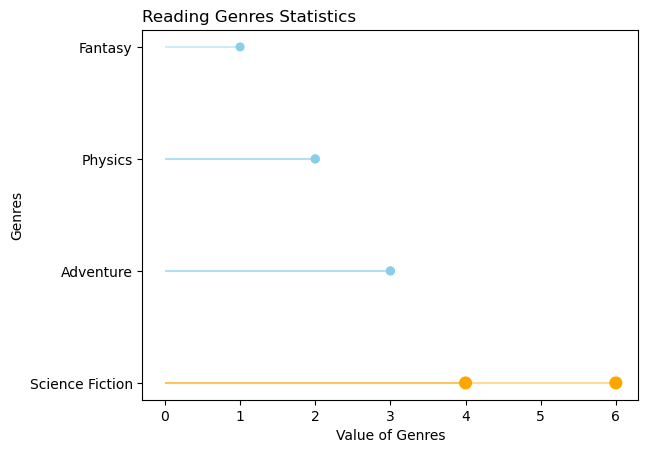

In [1]:
from flask import Flask, render_template, url_for, redirect, request, session
from datetime import date,datetime, timedelta
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import io
import base64

app = Flask(__name__,template_folder="templates")
app.secret_key = 'your_secret_key'

# loginpage
@app.route("/login", methods=["GET","POST"])
@app.route("/", methods=["GET","POST"])
def loginform():
    if request.method == 'POST':
        
        # get users data from DB
        db = 'dataset/library.db'
        conn = sqlite3.connect(db)
        users = pd.read_sql_query("SELECT userId,password,Name FROM usersProfile",conn)
        users.columns = ['userid', 'password', 'name']
        users = users.to_dict(orient='records')
        conn.commit()
        conn.close()
        
        # get the username and password from the form
        session['userid'] = request.form['userid']
        userid = request.form['userid']
        password = request.form['password']
        
        # check if the userid and pass are correct
        for user in users:
            if user['userid'] == userid and user['password'] == password:
                name = user['name']
                userid = user['userid']
                # Login successful
                return render_template("loginpage.html", username=name,userid=session['userid'])
#             else:
#                 return render_template('loginform.html')

    else:
        return render_template('loginform.html')

# logoutpage
@app.route("/logoutpage")
def logout():
    session.pop('userid', None)
    return render_template('logoutpage.html')

###############################################################################

# webpage 1 : homepage of the library
@app.route("/our_library")
def home():
    return render_template('our_library.html')

# webpage 2 : list of the books
@app.route('/discoverOurBooks')
def discoverOurBooks():
    db = 'dataset/library.db'
    conn = sqlite3.connect(db)
        
    c = conn.cursor()

    c.execute("SELECT bookId,title, genres,series,author FROM booksDataset")
    listOut=c.fetchall()

    conn.commit()
    conn.close()
    
    return render_template('discoverOurBooks.html', res=listOut,userid=session['userid'])

# webpage 3 : description of specific books
@app.route('/synopsis/<bookId>',methods=['GET'])
def synopsis(bookId):
    db = 'dataset/library.db'
    conn = sqlite3.connect(db)
        
    c = conn.cursor()

    c.execute('SELECT coverImg, title, description, bookId, genres, pages FROM booksDataset WHERE bookId="'+str(bookId)+'"')
    listOut=c.fetchall()

    conn.commit()
    conn.close()
    return render_template('synopsis.html', content=listOut,userid=session['userid'])




# webpage 4 : specific users' bookshelf
@app.route('/myBookshelf')
def myBookshelf():
    if 'userid' in session:
        # get the db
        db = 'dataset/library.db'
        conn = sqlite3.connect(db)
        borrowedBooks = pd.read_sql_query("SELECT userId, bookId, borrowedDate,returnedDate FROM borrowedBooks",conn)
        booksDataset = pd.read_sql_query("SELECT bookId, title, coverImg FROM booksDataset",conn)
        conn.commit()
        conn.close()
    
        # tweaking pandas df
        usersBookshelf = pd.merge(borrowedBooks,booksDataset, on='bookId')
        now = datetime.now()
        today = now.date()
        
        usersBookshelf['borrowedDate'] = pd.to_datetime(usersBookshelf['borrowedDate']).dt.date
        usersBookshelf['returnedDate'] = pd.to_datetime(usersBookshelf['returnedDate']).dt.date
        usersBookshelf['Days'] = (usersBookshelf['returnedDate'] -today)
        usersBookshelf['Days'] = usersBookshelf['Days'].astype('str')
        usersBookshelf['status']= np.where(usersBookshelf['returnedDate'] > today,
                                           usersBookshelf['Days'] +' to return','returned')
    
        usersBookshelf = usersBookshelf.loc[usersBookshelf['userId']==session['userid']]
        usersBookshelf = usersBookshelf.sort_values(by='borrowedDate',ascending=False)
    
        return render_template('myBookshelf.html',data=usersBookshelf,userid=session['userid'])
    else:
        return redirect("/")

# connect and write to DB : adding book to bookshelf
@app.route('/updateBookshelf/<bookId>',methods=["GET"])
def updateBookshelf(bookId):
    if 'userid' in session:
        userId = session['userid']
        borrowedDate = datetime.now()
        returnedDate = datetime.now() + timedelta(days=60)

        db = 'dataset/library.db'
        conn = sqlite3.connect(db)
        c = conn.cursor()

        # get genres book from DB
        c.execute('SELECT genres FROM booksDataset WHERE bookId="'+str(bookId)+'"')
        getGenres=c.fetchall()[0][0]

        # checking db
        checkBook = pd.read_sql_query("SELECT userId, bookId, borrowedDate,returnedDate FROM borrowedBooks where userId='"+str(userId)+"'",conn)

        # conditions updating db
        writeDb = """INSERT OR IGNORE INTO borrowedBooks (userId,bookId,genres,borrowedDate,returnedDate) VALUES (?,?,?,?,?)"""
        values = (userId,bookId,getGenres,borrowedDate,returnedDate)

        if bookId in checkBook['bookId'].values:
            return render_template ("bookAlreadyListed.html",userid=session['userid'])
        else:
            c.execute(writeDb,values)
            conn.commit()
            conn.close()
            return render_template ('addedtoBookshelf.html',userid=session['userid'])
    else:
        return redirect("/")



# webpage 5 : users profile
@app.route('/myProfile/<userId>',methods=['GET'])
def myProfile(userId):
    if 'userid' in session:
        db = 'dataset/library.db'
        conn = sqlite3.connect(db)
        c = conn.cursor()
    
        # usersProfile
        c.execute('SELECT userId, Name, Surname FROM usersProfile WHERE userId="'+str(userId)+'"')
        listOut=c.fetchall()
    
        # usersBooksStatistics    
        borrowedBooks = pd.read_sql_query("SELECT userId, bookId,genres,borrowedDate,returnedDate FROM borrowedBooks where userId='"+str(userId)+"'",conn)
        borrowedBooks_num = len(borrowedBooks)
        uniqueGenres_num = len(borrowedBooks.genres.unique())
        favGenre = borrowedBooks.genres.mode()[0]
        listStats = [borrowedBooks_num,uniqueGenres_num,favGenre]
    
        # usersAdditionalInfo
        addInfo = pd.read_sql_query("SELECT userId, occupation, profilePic FROM usersAddInfo where userId='"+str(userId)+"'",conn)
        occupation = addInfo['occupation'][0]
        profilePic = addInfo['profilePic'][0]
        addInfoUser = [occupation,profilePic]
    
        # users Graph
        userGenres = pd.DataFrame(borrowedBooks.genres.value_counts()).reset_index()
        userGenres.columns=['genres','count']
    
        my_range = range(1,len(userGenres.index)+1)
        my_color=np.where(userGenres['genres']==favGenre, 'orange', 'skyblue')
        my_size=np.where(userGenres['genres']==favGenre, 70, 30)
        plt.hlines(y=my_range, xmin=0, xmax=userGenres['count'], color=my_color, alpha=0.4)
        plt.scatter(userGenres['count'], my_range, color=my_color, s=my_size, alpha=1)
        plt.yticks(my_range, userGenres['genres'])
        plt.title("Reading Genres Statistics", loc='left')
        plt.xlabel('Value of Genres')
        plt.ylabel('Genres')
    
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        string = base64.b64encode(buf.read()).decode()
    
        # userspersonality
        personalityDf = pd.read_sql_query("SELECT genres, mergedGenres, personality, description, imgLink FROM personalityDesc where genres='"+str(favGenre)+"'",conn)
        personality = personalityDf.personality[0]
        description = personalityDf.description[0]
        personalityPic = personalityDf.imgLink[0]
        personalityInfo = [personality,description,personalityPic]
    
        conn.commit()
        conn.close()
        return render_template('myProfile.html',content=listOut,userid=session['userid'], stats=listStats,
                               info=addInfoUser,plot_url=string,personality=personalityInfo)
    else:
        return redirect("/")

if __name__ == '__main__':
    app.run()